In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_csv(file):
    df = pd.read_csv(file, parse_dates=True, index_col=0)
    return df

## XGBoost for Decomposition + Kalman imputed dataset


In [17]:
y_true = pd.read_csv(r'output\/CompleteCovid.csv',index_col=0).Asia_confirmed_cases
y_true_train = y_true.loc['2020-01-22 09:00:00':'2020-02-26 02:00:00']
y_true_test =  y_true.loc['2020-02-26 02:30:00':]

X_train = read_csv('output/\CompleteCovidTrainAddDecompKalman_0.csv')
X_test = read_csv('output/\CompleteCovidTestAddDecompKalman_0.csv')

y_train = X_train.Asia_confirmed_cases
y_test = X_test.Asia_confirmed_cases

X_train = X_train.drop('Asia_confirmed_cases', axis=1)
X_test = X_test.drop('Asia_confirmed_cases', axis=1)


xgb_model = xgb.XGBClassifier(objective="reg:squarederror",
                                  eval_metric = 'rmse',
                                  max_depth=4,
                                  n_estimators=50,
                                  learning_rate=0.1
                              )
model = xgb_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("\nRMSE: ", np.round(RMSE, 2))


y_true_test_reduced = pd.concat([y_true_test, y_test], axis=1).dropna().iloc[:, 0]
y_pred_reduced = pd.concat([y_true_test, pd.DataFrame(data=y_pred, index=y_true_test.index)], axis=1).dropna().iloc[:, 1]

MSE_real = mse(y_true_test_reduced, y_pred_reduced)
RMSE_real = np.sqrt(MSE_real)

print("\nRMSE with only real values: ", np.round(RMSE_real, 2))


RMSE:  inf

RMSE with only real values:  19176.85


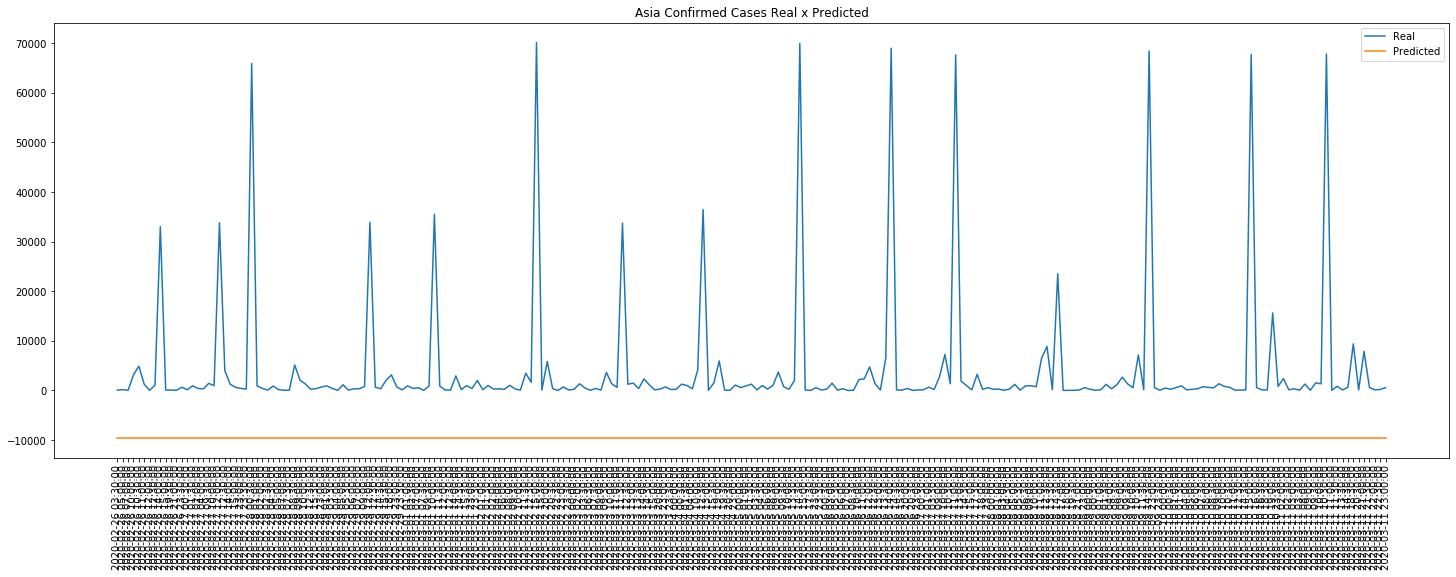

In [18]:
plt.figure(figsize=(25, 8))
plt.plot(y_true_test_reduced.index, y_true_test_reduced.values, label='Real')
plt.plot(y_pred_reduced.index, y_pred_reduced.values, label='Predicted')
plt.title("Asia Confirmed Cases Real x Predicted")
plt.xticks(rotation=90)
plt.legend()
plt.show()